/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/beach.png


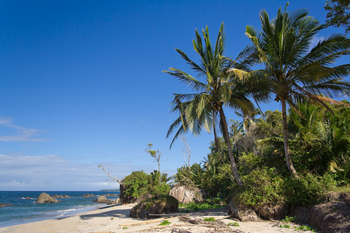

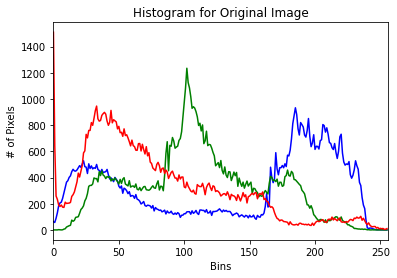

In [23]:
# USAGE
# python 3d_histogram.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any
from mpl_toolkits.mplot3d import Axes3D

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

def plot_histogram(image, title, mask=None):
    # Grab the image channels, initialize the tuple of colors
    # and the figure
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # Loop over the image channels
    for (chan, color) in zip(chans, colors):
        # Create a histogram for the current channel and plot it
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/beach.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))
plot_histogram(image, "Histogram for Original Image")
# image.shape



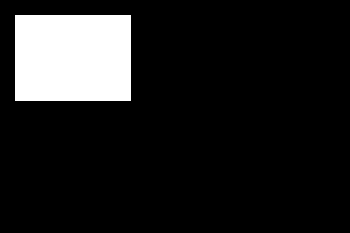

In [24]:
# Construct a mask for our image -- our mask will be BLACK for
# regions we want to IGNORE and WHITE for regions we want to
# EXAMINE. In this example we will be examining the foliage
# of the image, so we'll draw a white rectangle where the foliage
# is
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

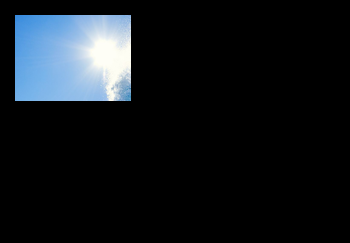

In [21]:
# What does masking our image look like?
masked = cv2.bitwise_and(image, image, mask=mask)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(masked, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

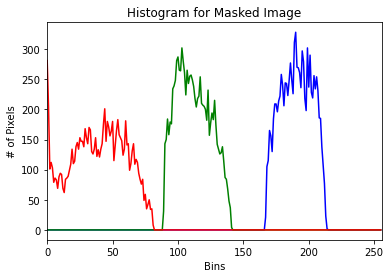

In [25]:
# Let's compute a histogram for our image, but we'll only include
# pixels in the masked region
plot_histogram(image, "Histogram for Masked Image", mask=mask)

# Show our plots
plt.show()
